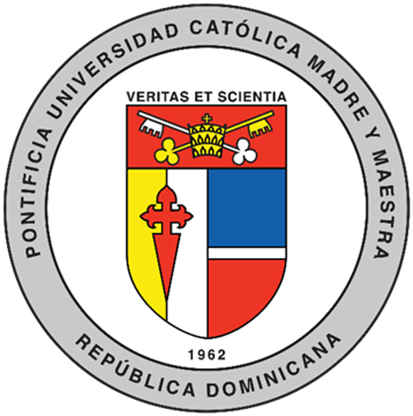

# **Proyecto Final**
## Grupo 9 Integrantes: **Edwin Balbuena (1014-9910) Daniel Almonte (1014-9898) Ronny Severivo (1014-4700)**
## Materia: **Inteligencia de Negocios**
## Facilitadora: **Lisibonny Beato**
## Fecha de entrega: **27/11/2024**





# Introducción al Notebook - Construcción del Modelo de Minería de Datos Descriptivo

## Objetivo del Notebook

*Este notebook tiene como propósito abordar la segunda tarea del Proyecto Final de Inteligencia de Negocios (ICC-321-T). La tarea consiste en la Construcción de un Modelo de Minería de Datos Descriptivo para analizar y extraer información oculta de las métricas del canal de YouTube The Quiz Challenge. Este modelo busca identificar patrones y características que influyen en el éxito de los videos para proporcionar estrategias efectivas que incrementen tanto las vistas como los suscriptores.*

## Contexto del Problema
*El canal de YouTube The Quiz Challenge enfrenta los siguientes desafíos clave:*

1.  Desempeño inconsistente de los videos: Algunos videos obtienen muchas vistas, pero no se comprende por qué.
2.  Conversión ineficaz de vistas a suscriptores: No hay una relación directa entre vistas altas y un aumento de suscriptores.
3.  Falta de decisiones basadas en datos: Actualmente, las decisiones sobre el contenido se toman por intuición o eventos temporales.


**💡 El canal necesita una estrategia basada en datos para decidir qué tipos, temáticas y características audiovisuales optimizar.**

##**Incognitas claves a responder**

*   ¿Qué características tienen los videos más exitosos?

*   ¿Qué temáticas o tipos de contenido deben priorizarse para maximizar vistas y suscriptores?
*   ¿Cómo mejorar el impacto de las características audiovisuales (audio, miniaturas, duración)?



---


# Metodología

*Para responder estas preguntas, se aplicará un modelo de Clustering que agrupa los videos en categorías basadas en similitudes en sus características. Esto permitirá identificar patrones que no son evidentes de manera directa.*

#**Pasos principales:**

*   🔎 Exploración y preparación de datos:  Integrar múltiples fuentes de datos del canal (vistas, suscriptores, calidad de audio, análisis de miniaturas). Transformar y limpiar datos para garantizar su calidad y consistencia.

*   ⚙️ Construcción del modelo de clustering: Seleccionar las métricas clave (e.g., vistas, suscriptores, tasas de clics, calidad de audio). Normalizar los datos y aplicar el algoritmo K-Means. Determinar el número óptimo de clusters con el Método del Codo.

*   📊 Visualización y análisis de resultados: Generar gráficos que expliquen las relaciones entre métricas y clusters (mapas de calor, gráficos de dispersión). Identificar patrones clave en cada grupo.

*   ✅ Conclusiones y recomendaciones: Proporcionar estrategias basadas en datos para mejorar el engagement y el crecimiento del canal.


---


#**Objetivo del Proyecto**
El objetivo es proveer un modelo descriptivo que ayude a The Quiz Challenge a:

1.  Determinar qué características optimizar en sus videos.

2.  Identificar temáticas y estilos de contenido con mayor potencial de éxito.

3.  Tomar decisiones informadas basadas en datos para maximizar el impacto en vistas y suscriptores.



---


#**📌 Nota: Este notebook está diseñado para ejecutarse en Google Colab y está completamente documentado para facilitar su comprensión y uso por tercero**

# **1. Importar librerías**

In [ ]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

*En esta sección del código se importan las bibliotecas necesarias para el análisis y modelado de datos. pandas y numpy se utilizan para manejar y realizar cálculos sobre los datos, mientras que matplotlib y seaborn permiten crear visualizaciones para explorar y comunicar los resultados. Además, se importan herramientas de scikit-learn como StandardScaler, para normalizar los datos, y KMeans, que se emplea para realizar el clustering y descubrir patrones dentro del dataset. Estas librerías forman la base del análisis y preparación de los datos para este proyecto.*

# **2. Montar Drive con los datos**

In [ ]:
#Montar el drive para trabajo en equipo
from google.colab import drive

drive.mount('/content/drive')

try:
  df = pd.read_csv('/content/drive/MyDrive/PROYECTO FINAL INT NEGOCIOS/Contenido.csv')
  print(df)
except FileNotFoundError:
  print("Error: File not found. Please check the file path.")
except pd.errors.ParserError:
  print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")




*En esta sección, se monta Google Drive en el entorno de Google Colab mediante drive.mount para acceder y trabajar con archivos almacenados en el Drive compartido del equipo. Se utiliza un bloque try-except para cargar un archivo CSV específico, en este caso, Contenido.csv, utilizando pandas.*

## **3. Resumen de Datos**


In [ ]:
ruta_base = '/content/drive/MyDrive/PROYECTO FINAL INT NEGOCIOS/'


archivos = {
    "Contenido": "Contenido.csv",
    "Audio Quality": "Audio Quality.csv",
    "Image Analysis": "image_analysis.csv",
    "Area Geografica": "Area Geografica.csv",
    "Edad": "Edad.csv",
    "Estado de Suscripción": "Estado de Supscricion.csv",
    "Fecha": "Fecha.csv",
    "Fuente": "Fuente.csv",
    "Origen Subs": "OrigenSubs.csv",
    "Pantalla Final": "PantallaFinal.csv",
    "Sexo": "Sexo.csv",
    "Tipo de Contenido": "TipoContenido.csv"
}

# Diccionario para almacenar los DataFrames

datos = {}

# Cargar los datos con manejo de errores
for nombre, archivo in archivos.items():
    try:
        datos[nombre] = pd.read_csv(ruta_base + archivo)
        print(f"\nDatos de '{nombre}' cargados exitosamente.")
    except FileNotFoundError:
        print(f"Error: Archivo '{archivo}' no encontrado.")
    except pd.errors.ParserError:
        print(f"Error: Problema al analizar '{archivo}'. Verifica el formato.")
    except Exception as e:
        print(f"Un error inesperado ocurrió al cargar '{archivo}': {e}")






Datos de 'Contenido' cargados exitosamente.

Datos de 'Audio Quality' cargados exitosamente.

Datos de 'Image Analysis' cargados exitosamente.

Datos de 'Area Geografica' cargados exitosamente.

Datos de 'Edad' cargados exitosamente.

Datos de 'Estado de Suscripción' cargados exitosamente.

Datos de 'Fecha' cargados exitosamente.

Datos de 'Fuente' cargados exitosamente.

Datos de 'Origen Subs' cargados exitosamente.

Datos de 'Pantalla Final' cargados exitosamente.

Datos de 'Sexo' cargados exitosamente.

Datos de 'Tipo de Contenido' cargados exitosamente.


In [ ]:
# Mostrar solo las primeras 5 filas de cada dataset
for nombre, df in datos.items():
    print(f"\nPrimeros 5 datos del dataset '{nombre}':")
    print(df.head())
    print("-" * 80)


Primeros 5 datos del dataset 'Contenido':
                          Título del video Tiempo de publicación del video  \
0        Animal Quiz for Kids | Facts Quiz                       5/22/2024   
1  Capitals of the World Quiz | Facts Quiz                       5/22/2024   
2         Flags Quiz for Kids | Facts Quiz                        6/5/2024   
3          African Flags Quiz | Facts Quiz                       6/11/2024   
4               Olympics Quiz | Facts Quiz                       6/21/2024   

   Vistas  Tiempo de reproducción (horas)  Suscriptores  \
0   145.0                          2.3205           8.0   
1   101.0                          1.1407           0.0   
2   153.0                          2.5069           2.0   
3   114.0                          0.8850           1.0   
4  6961.0                         91.8560          30.0   

  Duración promedio de vistas  Impresiones  \
0                     0:00:57        777.0   
1                     0:00:40        986.

# **4. Gráficos Exploratórios**

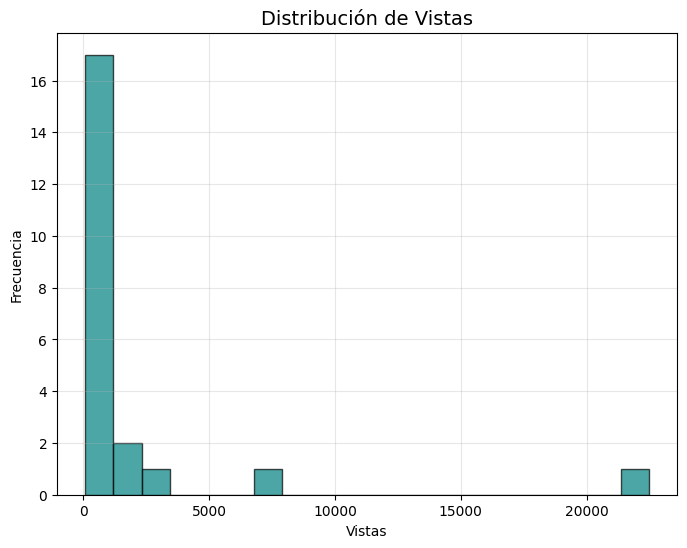

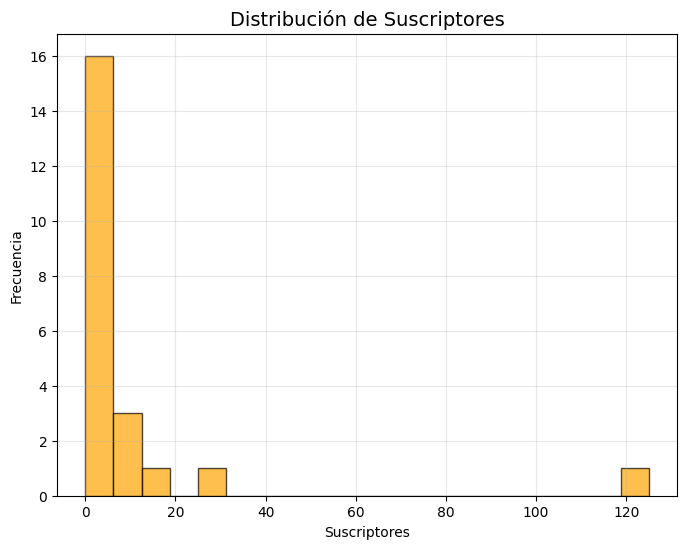

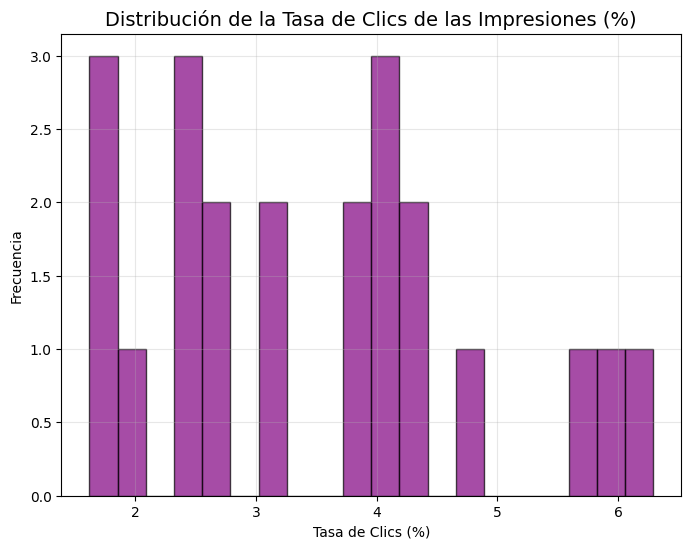

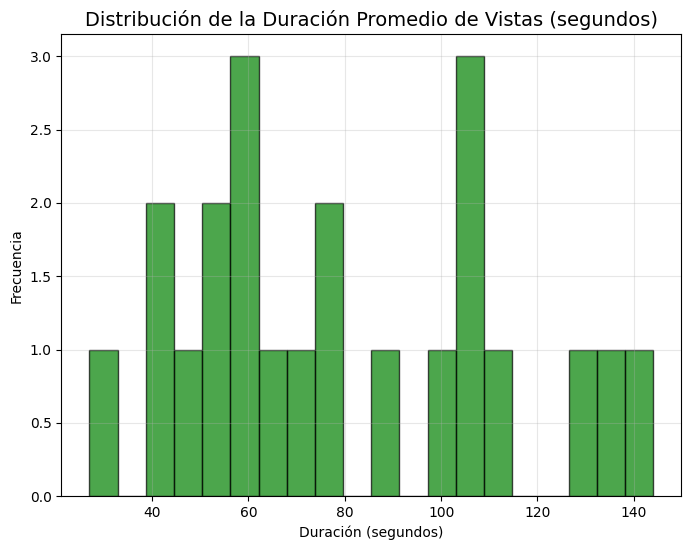

In [ ]:
contenido = pd.read_csv(ruta_base + 'Contenido.csv')


# Histograma de Vistas
plt.figure(figsize=(8, 6))
plt.hist(contenido['Vistas'], bins=20, edgecolor='black', alpha=0.7, color='teal')
plt.title('Distribución de Vistas', fontsize=14)
plt.xlabel('Vistas')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

# Histograma de Suscriptores
plt.figure(figsize=(8, 6))
plt.hist(contenido['Suscriptores'], bins=20, edgecolor='black', alpha=0.7, color='orange')
plt.title('Distribución de Suscriptores', fontsize=14)
plt.xlabel('Suscriptores')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

# Histograma de Tasa de Clics de las Impresiones (%)
plt.figure(figsize=(8, 6))
plt.hist(contenido['Tasa de clics de las impresiones (%)'], bins=20, edgecolor='black', alpha=0.7, color='purple')
plt.title('Distribución de la Tasa de Clics de las Impresiones (%)', fontsize=14)
plt.xlabel('Tasa de Clics (%)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

# Histograma de Duración Promedio de Vistas
contenido['Duración promedio de vistas (seg)'] = pd.to_timedelta(contenido['Duración promedio de vistas'], errors='coerce').dt.total_seconds()
plt.figure(figsize=(8, 6))
plt.hist(contenido['Duración promedio de vistas (seg)'], bins=20, edgecolor='black', alpha=0.7, color='green')
plt.title('Distribución de la Duración Promedio de Vistas (segundos)', fontsize=14)
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()


# **5. Gráficos de Dispersión**

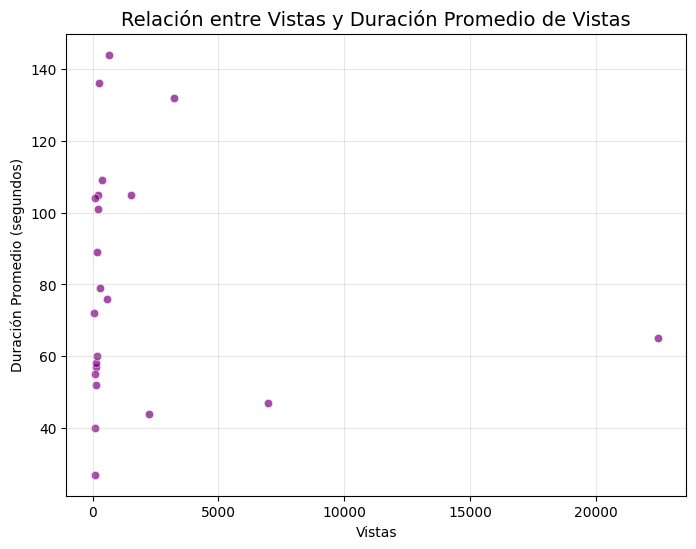

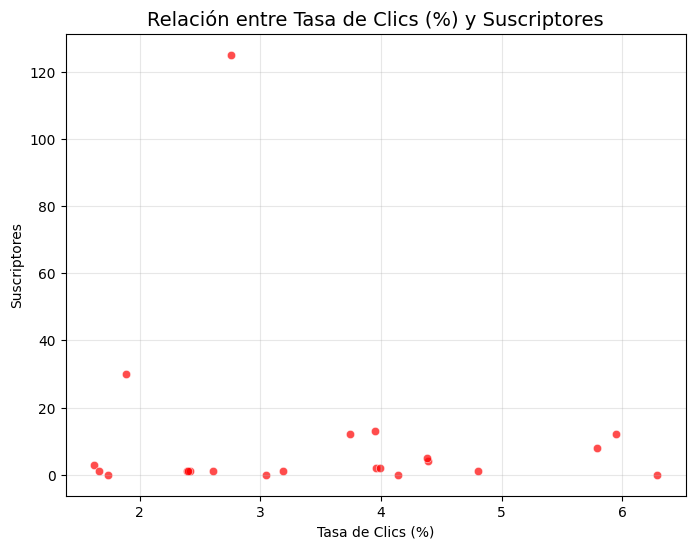

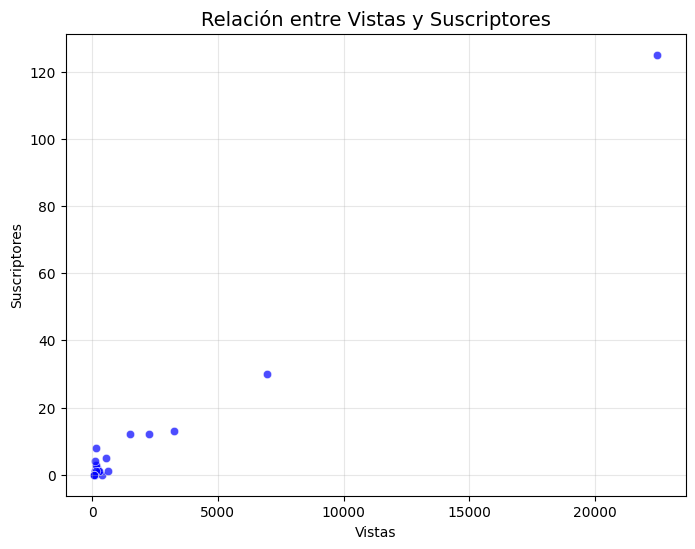

In [ ]:
# Gráfico de Dispersión: Vistas vs. Duración Promedio de Vistas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=contenido, x='Vistas', y='Duración promedio de vistas (seg)', alpha=0.7, color='purple')
plt.title('Relación entre Vistas y Duración Promedio de Vistas', fontsize=14)
plt.xlabel('Vistas')
plt.ylabel('Duración Promedio (segundos)')
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de Dispersión: Tasa de Clics vs. Suscriptores
plt.figure(figsize=(8, 6))
sns.scatterplot(data=contenido, x='Tasa de clics de las impresiones (%)', y='Suscriptores', alpha=0.7, color='red')
plt.title('Relación entre Tasa de Clics (%) y Suscriptores', fontsize=14)
plt.xlabel('Tasa de Clics (%)')
plt.ylabel('Suscriptores')
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de Dispersión: Vistas vs. Suscriptores
plt.figure(figsize=(8, 6))
sns.scatterplot(data=contenido, x='Vistas', y='Suscriptores', alpha=0.7, color='blue')
plt.title('Relación entre Vistas y Suscriptores', fontsize=14)
plt.xlabel('Vistas')
plt.ylabel('Suscriptores')
plt.grid(True, alpha=0.3)
plt.show()


## **6. Seleccionar y Preparar Datos para Clustering**



In [ ]:
# Cargar tablas relevantes
contenido = pd.read_csv(ruta_base + 'Contenido.csv')
audio_quality = pd.read_csv(ruta_base + 'Audio Quality.csv')
image_analysis = pd.read_csv(ruta_base + 'image_analysis.csv')

# Procesar los datos
# Extraer solo los valores numéricos de los niveles de audio en decibeles (dB)
audio_quality['Volumen de Audio (dB)'] = audio_quality['Volumne de Audio'].str.extract(r'([-+]?[0-9]*\.?[0-9]+)').astype(float)

# Mantener solo las columnas relevantes del análisis de imágenes
image_analysis = image_analysis.rename(columns={'Image Name': 'Título del video'})
image_analysis = image_analysis[['Título del video', 'Main Confidence', 'Average Confidence', 'Number of Labels']]

# Unir datos de contenido con Volumen de Audio y Análisis de Imágenes
contenido = contenido.merge(audio_quality[['Título del video', 'Volumen de Audio (dB)']], on="Título del video", how="left")
contenido = contenido.merge(image_analysis, on="Título del video", how="left")

# Manejar valores faltantes con NaN
contenido = contenido.where(pd.notnull(contenido), None)

print("\nCargados y unificados todos los datos relevantes.")


Cargados y unificados todos los datos relevantes.


*Este bloque de código carga y procesa datos de tres fuentes: información general de videos (Contenido.csv), niveles de audio (Audio Quality.csv), y análisis de miniaturas (image_analysis.csv). Extrae valores numéricos de volumen en decibeles, selecciona columnas clave de las miniaturas (confianza, promedio y etiquetas), y combina todos los datos en un único dataset usando el título del video como clave.*

In [ ]:
# Seleccionar métricas relevantes para el clustering
columnas_clustering = ["Vistas", "Suscriptores", "Tasa de clics de las impresiones (%)",
                        "Duración promedio de vistas", "Volumen de Audio (dB)",
                        "Main Confidence", "Average Confidence", "Number of Labels"]

# Filtrar columnas disponibles en la tabla
columnas_usadas = [col for col in columnas_clustering if col in contenido.columns]
clustering_data = contenido[columnas_usadas].copy()

print("\nColumnas utilizadas para el clustering:")
print(columnas_usadas)

# Convertir columnas de tiempo a segundos
if "Duración promedio de vistas" in clustering_data.columns:
    clustering_data["Duración promedio de vistas"] = pd.to_timedelta(
        clustering_data["Duración promedio de vistas"], errors='coerce'
    ).dt.total_seconds()

# Normalizar los datos
clustering_data = clustering_data.fillna(0)  # Rellenar NaN temporalmente para normalización
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

print("\nDatos seleccionados y normalizados.")


Columnas utilizadas para el clustering:
['Vistas', 'Suscriptores', 'Tasa de clics de las impresiones (%)', 'Duración promedio de vistas', 'Volumen de Audio (dB)', 'Main Confidence', 'Average Confidence', 'Number of Labels']

Datos seleccionados y normalizados.


 *Se seleccionan métricas clave del dataset, como vistas, suscriptores, tasa de clics, duración promedio de vistas y características de las miniaturas, para el análisis de clustering. Se filtran las columnas disponibles, convirtiendo la duración promedio a segundos para facilitar su uso en cálculos. Los valores faltantes se rellenan temporalmente con ceros y los datos se normalizan utilizando StandardScaler para garantizar que todas las métricas estén en la misma escala, preparando el conjunto de datos para la aplicación de algoritmos de clustering.*

## **7. Clustering y Determinación del Número Óptimo de Clusters**


Determinamos el número óptimo de clusters para nuestro análisis utilizando el Método del Codo. Calculamos la inercia para diferentes valores de k (número de clusters) y graficamos los resultados. Esto nos permite identificar el punto donde agregar más clusters no mejora significativamente la agrupación, ayudándonos a elegir el número adecuado de clusters para nuestro análisis.

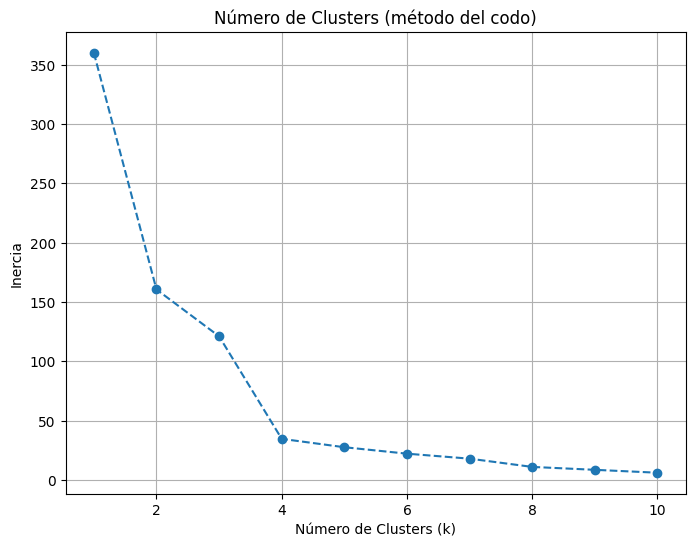

In [ ]:
# Determinar el número óptimo de clusters (Método del Codo)
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Número de Clusters (método del codo)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

El gráfico que muestra el método del codo para determinar el número óptimo de clústeres indica que, a medida que aumenta el número de clústeres, la variación dentro del clúster (representada en el eje Y) disminuye. Sin embargo, se observa que, después de un número específico de clústeres, la disminución en la variación interna se vuelve más gradual, formando un "codo" en el gráfico. Este "codo" se encuentra típicamente en el punto donde el rendimiento mejora de manera marginal con la adición de más clústeres, lo que sugiere que el número óptimo de clústeres es aquel en el que se produce este cambio en la pendiente. En este caso, el número de clústeres óptimo parece ser 3, ya que después de este punto, la mejora en la varianza es poco significativa.

# **8. Aplicación del Clustering**

In [ ]:
# Aplicar K-Means Clustering
# Elegir número de clusters según el codo
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Añadir los clusters a los datos originales
clustering_data['Cluster'] = clusters
contenido['Cluster'] = clusters

# Resumen del clustering
cluster_summary = clustering_data.groupby('Cluster').mean()
print("\nResumen de Clusters (Promedios):")
print(cluster_summary)


Resumen de Clusters (Promedios):
             Vistas  Suscriptores  Tasa de clics de las impresiones (%)  \
Cluster                                                                   
0        893.133333      5.333333                              3.942667   
1        936.500000      5.208333                              0.115000   
2        729.500000      3.000000                              2.535000   

         Duración promedio de vistas  Volumen de Audio (dB)  Main Confidence  \
Cluster                                                                        
0                          68.066667               1.374000         0.884078   
1                           2.708333               0.000000         0.000000   
2                         111.833333              -3.676667         0.909005   

         Average Confidence  Number of Labels  
Cluster                                        
0                  0.740749              10.0  
1                  0.000000               0.0

Aplica el algoritmo de K-Means Clustering al conjunto de datos normalizados, utilizando 3 clusters según lo determinado previamente por el método del codo. Los clusters asignados se añaden tanto al conjunto de datos normalizado como al original (clustering_data y contenido). Luego, se calcula un resumen de las métricas promedio para cada cluster, lo que proporciona una visión general de las características principales que diferencian cada grupo, facilitando la interpretación y análisis de los resultados del clustering.

# **9. Visualización de Resultados**

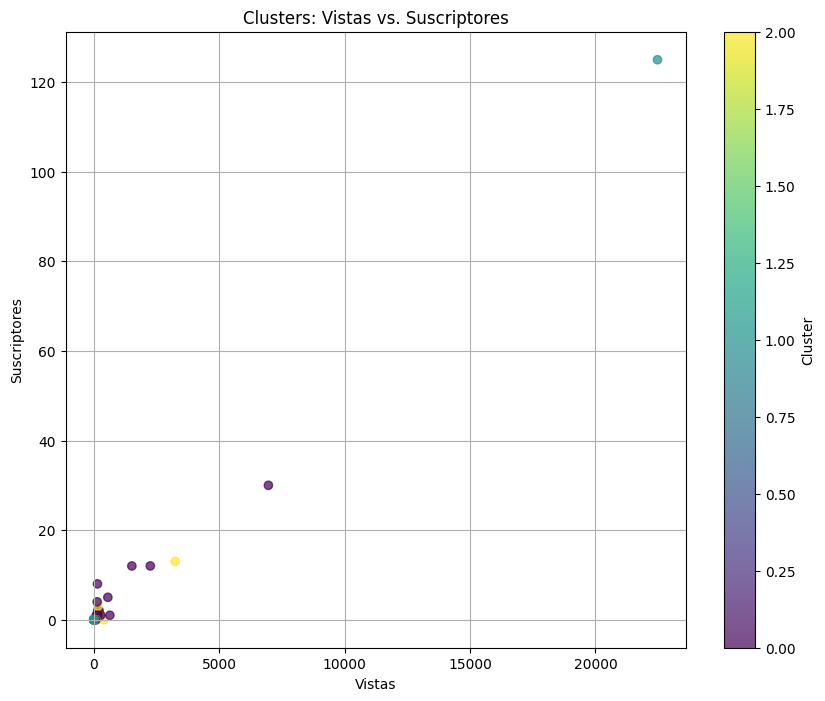

In [ ]:
# Graficar los clusters
plt.figure(figsize=(10, 8))
plt.scatter(clustering_data['Vistas'], clustering_data['Suscriptores'], c=clustering_data['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Clusters: Vistas vs. Suscriptores')
plt.xlabel('Vistas')
plt.ylabel('Suscriptores')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()



#**Resultados**
El análisis agrupó los videos en tres clusters con características distintas:

*   Cluster 0 (Rendimiento Promedio): Videos con buen desempeño general en vistas (893) y suscriptores (5.33), acompañados de alta tasa de clics (3.94%) y duración moderada de vistas (68 segundos). Representan un estándar funcional para el canal.

*   Cluster 1 (Rendimiento Bajo): Videos con métricas bajas en tasa de clics (0.11%) y duración promedio de vistas (2.7 segundos), pero un caso atípico alcanzó 7,000 vistas, destacando la importancia de analizar factores específicos de éxito.

*   Cluster 2 (Alta Retención): Videos con menor número de vistas (729) pero alta retención (111 segundos) y buena calidad de audio e imagen, lo que indica una conexión efectiva con la audiencia.

##Observaciones

El Cluster 1 requiere optimización en miniaturas y títulos, mientras que el Cluster 2 demuestra la importancia de la calidad para la retención. El caso atípico del Cluster 1 puede proporcionar aprendizajes clave para replicar su éxito en otros videos.

# **10. Otros análisis**

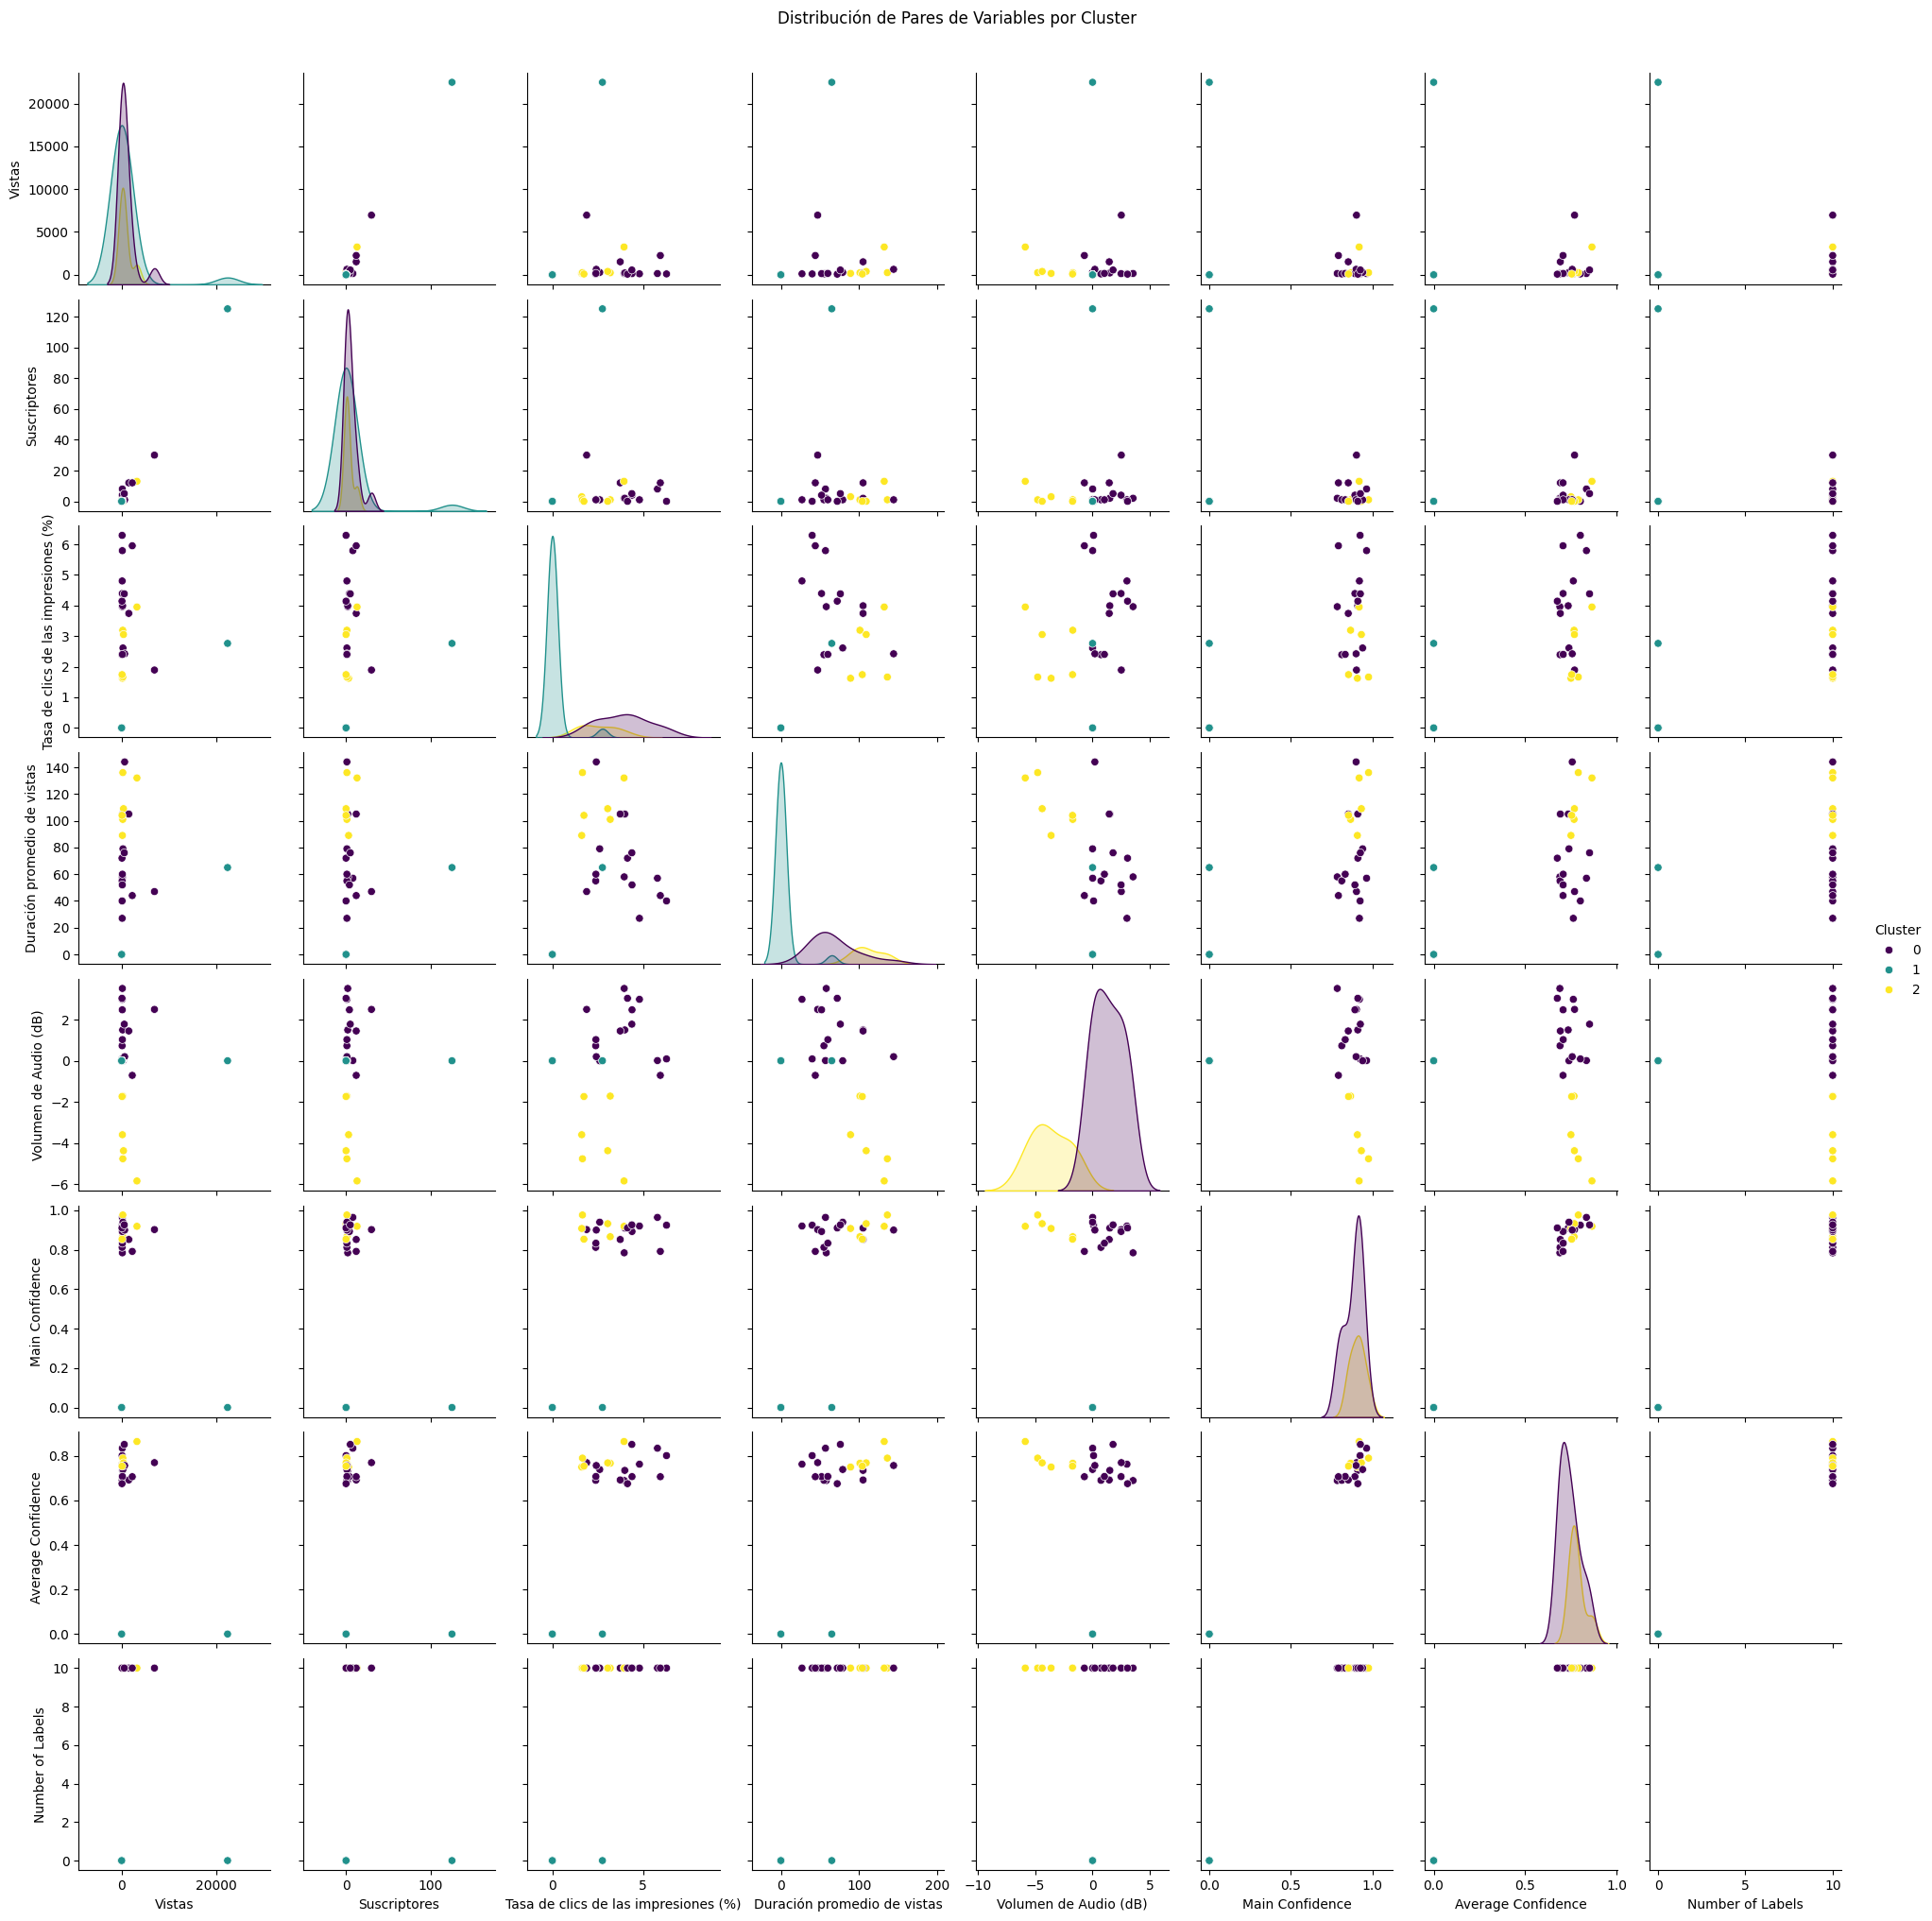

In [ ]:
# Generar un gráfico de pares para visualizar la distribución de las variables por cluster
sns.pairplot(clustering_data, hue="Cluster", diag_kind="kde", palette="viridis")

# Añadir un título al gráfico
plt.suptitle('Distribución de Pares de Variables por Cluster', y=1.02)

# Mostrar el gráfico
plt.show()


 *Incluye múltiples visualizaciones que muestran cómo las variables clave como vistas, suscriptores, duración promedio y calidad de audio se distribuyen y se relacionan dentro de cada cluster. A través de estos gráficos:*

*   Cluster 0: Los gráficos indican que este grupo representa videos con un rendimiento promedio en vistas y suscriptores, con métricas consistentes de retención y calidad.

*   Cluster 1: Los gráficos de baja densidad y dispersión reflejan videos con bajo rendimiento general, destacando áreas críticas de mejora.

*   Cluster 2: Se observa que los videos de este cluster tienen alta retención (duración promedio) y consistencia en calidad, pero menor impacto en vistas y suscriptores.

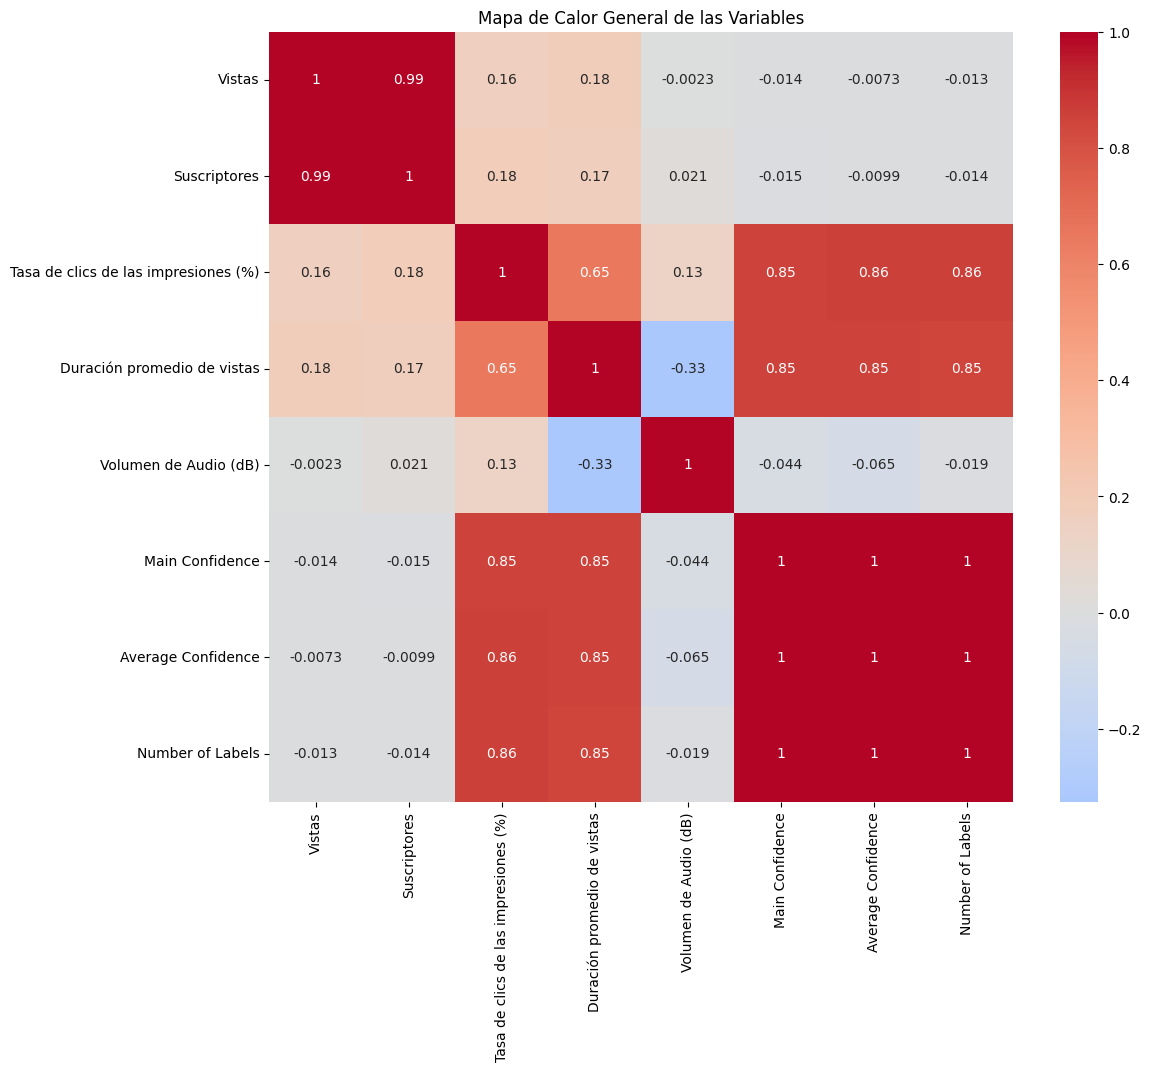

In [ ]:
# Crear un mapa de calor general con todas las variables
plt.figure(figsize=(12, 10))
sns.heatmap(clustering_data.drop(columns='Cluster').corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de Calor General de las Variables")
plt.show()


1.   Vistas y Suscriptores están fuertemente correlacionadas (0.99), confirmando que más vistas generan más suscriptores. Esto refuerza la necesidad de optimizar el contenido para maximizar el alcance.

2.   Tasa de clics de las impresiones (%) muestra una correlación positiva con la Duración promedio de vistas (0.65), lo que sugiere que videos más atractivos y bien estructurados retienen mejor a los espectadores.

3.   Miniaturas (Main Confidence y Average Confidence) están altamente correlacionadas con la Tasa de clics y la Duración promedio, subrayando la importancia de miniaturas bien diseñadas para captar atención.

4.   Volumen de Audio tiene una ligera relación negativa (-0.33) con la Duración promedio de vistas, indicando que niveles extremos de audio podrían ser perjudiciales.

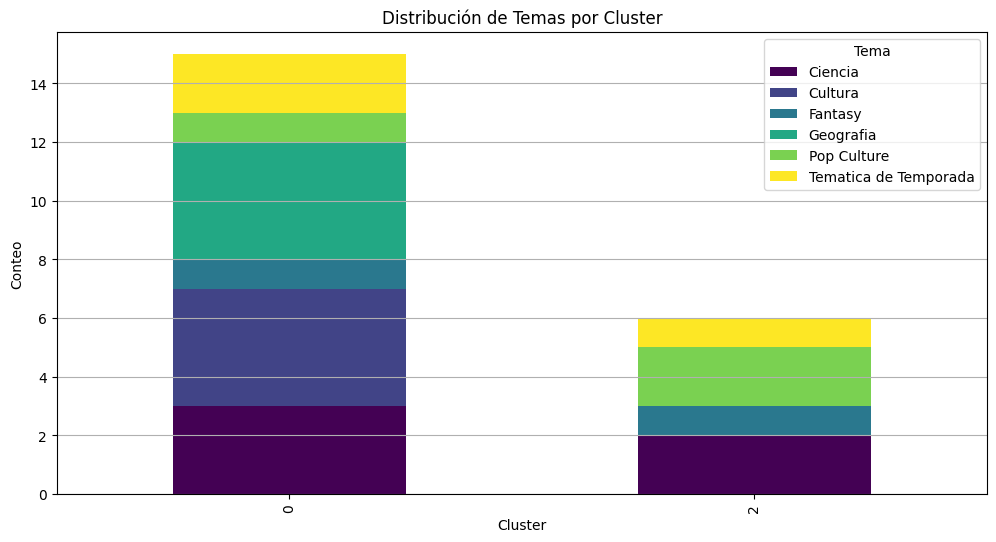

In [ ]:
# Agrupar los datos por Cluster y Tema, y contar la cantidad de ocurrencias de cada tema en cada cluster
cluster_category = contenido.groupby(['Cluster', 'Tema']).size().unstack()

# Crear un gráfico de barras apiladas para visualizar la distribución de temas por cluster
cluster_category.plot(
    kind='bar',
    stacked=True,  # Las barras serán apiladas para mostrar el total por cluster
    figsize=(12, 6),  # Tamaño del gráfico
    colormap='viridis'  # Esquema de colores
)

# Añadir título y etiquetas al gráfico
plt.title('Distribución de Temas por Cluster')  # Título del gráfico
plt.ylabel('Conteo')  # Etiqueta del eje Y
plt.xlabel('Cluster')  # Etiqueta del eje X

# Añadir líneas de referencia en el eje Y para facilitar la interpretación
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()


# Análisis de la Eficiencia Visual de Miniaturas con Google Vision API

*Se utiliza la API de Google Cloud Vision para realizar un análisis automatizado de las imágenes en una carpeta específica. Primero, configura las credenciales necesarias para autenticar el cliente de Vision. Luego, para cada imagen en la carpeta, extrae etiquetas principales, texto detectado mediante OCR (Reconocimiento Óptico de Caracteres) y colores dominantes. El análisis incluye la descripción de la etiqueta principal, su nivel de confianza, el promedio de confianza entre todas las etiquetas y los colores en formato RGB. Los resultados de todas las imágenes procesadas se guardan en un archivo CSV con detalles como el nombre de la imagen, la etiqueta principal, la confianza promedio, el texto detectado y los colores dominantes*

In [ ]:
!pip install google-cloud-vision
import os
import io
import csv
from google.cloud import vision

# Configurar las credenciales
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/the-quiz-challenge-82427578332e.json"

# Configurar el cliente de Vision
client = vision.ImageAnnotatorClient()

# Ruta de la carpeta de imágenes
image_folder = "/content/Miniaturas"

# CSV para guardar los resultados
output_csv = "/content/image_analysis.csv"

# Función para analizar una imagen
def analyze_image(image_path):
    with io.open(image_path, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content=content)

    # Análisis de etiquetas
    label_response = client.label_detection(image=image)
    labels = label_response.label_annotations
    label_data = [(label.description, label.score) for label in labels]
    main_label = label_data[0][0] if label_data else "N/A"
    main_confidence = label_data[0][1] if label_data else 0
    avg_confidence = sum([score for _, score in label_data]) / len(label_data) if label_data else 0

    # Análisis de texto (OCR)
    text_response = client.text_detection(image=image)
    detected_text = " ".join([text.description for text in text_response.text_annotations]) if text_response.text_annotations else "N/A"

    # Análisis de colores dominantes
    color_response = client.image_properties(image=image)
    dominant_colors = [f"RGB({int(c.color.red)}, {int(c.color.green)}, {int(c.color.blue)})" for c in color_response.image_properties_annotation.dominant_colors.colors] if color_response.image_properties_annotation else []

    return {
        "Image Name": os.path.basename(image_path),
        "Main Label": main_label,
        "Main Confidence": main_confidence,
        "Average Confidence": avg_confidence,
        "Number of Labels": len(label_data),
        "Detected Text": detected_text,
        "Dominant Colors": ", ".join(dominant_colors)
    }

# Procesar todas las imágenes y guardar en CSV
with open(output_csv, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=[
        "Image Name", "Main Label", "Main Confidence",
        "Average Confidence", "Number of Labels",
        "Detected Text", "Dominant Colors"
    ])
    writer.writeheader()
    for image_name in os.listdir(image_folder):
        if image_name.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(image_folder, image_name)
            data = analyze_image(image_path)
            writer.writerow(data)

print(f"Análisis completado. Resultados guardados en {output_csv}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/Miniaturas'

## Extracción de IDs de Videos Usando YouTube Data API V3

*Utiliza la API de YouTube Data para extraer los IDs de los videos de un canal específico. Primero, se carga la API Key desde un archivo de texto para autenticarse. Luego, se conecta a la API de YouTube para obtener el ID de la lista de reproducción de subidas (uploads playlist) asociada al canal indicado. A partir de esta lista, se extraen los IDs de los videos en lotes de hasta 50 videos por solicitud, navegando por todas las páginas de resultados mediante tokens de paginación. Los IDs de los videos recopilados se guardan en un archivo CSV con un encabezado para su posterior uso o análisis.*

In [ ]:
!pip install google-api-python-client

from googleapiclient.discovery import build
import csv

# Cargar API Key desde un archivo de texto
with open('/content/API YT.txt', 'r') as file:
    API_KEY = file.read().strip()

CHANNEL_ID = 'UC30vRBFka6oZMaZ7Gyu3rRA'  # Reemplaza con el ID del canal

def get_channel_video_ids(api_key, channel_id):
    youtube = build('youtube', 'v3', developerKey=api_key)
    video_ids = []

    # Obtener los uploads playlist ID
    response = youtube.channels().list(part='contentDetails', id=channel_id).execute()
    uploads_playlist_id = response['items'][0]['contentDetails']['relatedPlaylists']['uploads']

    # Obtener los videos de la playlist
    next_page_token = None
    while True:
        playlist_response = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=uploads_playlist_id,
            maxResults=50,
            pageToken=next_page_token
        ).execute()

        for item in playlist_response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = playlist_response.get('nextPageToken')
        if not next_page_token:
            break

    return video_ids

def save_to_csv(video_ids, output_path):
    with open(output_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Video ID"])  # Escribir encabezado
        for video_id in video_ids:
            writer.writerow([video_id])
    print(f"Los IDs se guardaron correctamente en {output_path}")

# Ejecutar la función
video_ids = get_channel_video_ids(API_KEY, CHANNEL_ID)

# Guardar en CSV
output_csv_path = "youtube_video_ids.csv"  # Ruta del archivo CSV
save_to_csv(video_ids, output_csv_path)


Los IDs se guardaron correctamente en youtube_video_ids.csv


# 11. **Conclusión y Recomendaciones para The Quiz Challenge**

## **Análisis de Clusters y Resultados**

### **Cluster 0: Videos de Rendimiento Moderado**
- **Promedio de vistas:** 893
- **Tasa de clics:** 3.94%
- **Duración promedio de vistas:** 68 segundos
- **Ejemplos de Videos:**
  - Quizzes generales como **"Trivia de Geografía"** o **"Datos curiosos sobre la ciencia"**.
  - Temas de interés medio que atraen audiencia, pero no necesariamente mantienen una alta retención.
- **Características principales:**
  - Rendimiento estable, pero sin alcanzar un gran impacto en suscriptores.
  - Buen punto de partida para estrategias de optimización.

---

### **Cluster 1: Videos de Bajo Rendimiento y Comportamiento Anómalo**
- **Promedio de vistas:** 936
- **Tasa de clics:** 0.11%
- **Duración promedio de vistas:** 2.7 segundos
- **Ejemplos de Videos:**
  - Videos con títulos poco claros o miniaturas poco llamativas, como **"¿Sabes sobre animales extraños?"**.
  - Temáticas de nicho con bajo interés o videos con problemas técnicos.
- **Anomalía Detectada:**
  - Dentro de este grupo, un video alcanzó **7,000 vistas**, posicionándose cerca de los resultados del Cluster 2.
  - Este caso sugiere que, con las mejoras adecuadas, estos videos tienen potencial de éxito.
- **Características principales:**
  - Problemas en elementos clave como miniaturas, títulos o el contenido inicial del video.

---

### **Cluster 2: Videos de Alta Interacción**
- **Promedio de vistas:** 729
- **Tasa de clics:** 2.53%
- **Duración promedio de vistas:** 112 segundos
- **Ejemplos de Videos:**
  - Quizzes interactivos y específicos como **"Test sobre el ciclo del agua"** o **"Trivia de Harry Potter"**.
  - Videos de temáticas populares y con contenido entretenido y bien diseñado.
- **Características principales:**
  - Alto nivel de retención y engagement.
  - Estos videos son ideales para atraer suscriptores y sirven como referencia para generar más contenido exitoso.

---

## **Recomendaciones para Incrementar Vistas y Monetización**

### **1. Aprovechar el Caso de las 7,000 Vistas**
- **Ejemplo relevante:** Revisar el contenido, título y miniatura del video destacado en el Cluster 1.
- **Acción:** Replicar estrategias como títulos llamativos y temáticas similares en videos de bajo rendimiento.

---

### **2. Mejorar el Desempeño del Cluster 1**
- **Estrategias:**
  - Rediseñar miniaturas con colores vibrantes y textos claros.
  - Ajustar títulos para generar curiosidad, como **"10 preguntas imposibles sobre animales"**.
  - Optimizar los primeros **10 segundos** del contenido para enganchar a la audiencia.
- **Objetivo:** Incrementar la tasa de clics y retención inicial.

---

### **3. Fortalecer Videos del Cluster 2**
- **Ejemplo relevante:** Videos de alta interacción como **"Trivia de Harry Potter"** son ideales para promoción cruzada.
- **Acción:** Crear más contenido basado en temáticas populares con métricas positivas.

---

### **4. Incentivar la Suscripción**
- Incluir llamados a la acción (CTAs) en videos de alta retención, como **"¿Te gustó este quiz? Suscríbete para más!"**.
- Promocionar los mejores videos en redes sociales y playlists destacadas.

---

### **5. Monitoreo y Ajuste Continuo**
- Utilizar un dashboard interactivo para rastrear métricas clave como vistas, clics y retención.
- Reevaluar la estrategia cada mes para mantener el crecimiento y optimizar contenido futuro.

---

## **Veredicto**

El análisis demuestra que la monetización de **The Quiz Challenge** depende de:
1. **Rescatar videos de bajo rendimiento (Cluster 1)** ajustando elementos visuales y temáticos.
2. **Replicar el éxito del Cluster 2** enfocándose en videos de alta interacción y retención.
3. **Aprovechar ejemplos exitosos (7,000 vistas)** para guiar estrategias futuras.

Con estos ajustes, el canal podrá aumentar las vistas y alcanzar los requisitos necesarios para la monetización.
